# Clustering of IOT devices
Project topic ish: IoT Device Grouping in 5G Networks Using ML methods for Enhanced Resource Management

[Link to dataset](https://www.kaggle.com/datasets/suraj520/cellular-network-analysis-dataset)

This dataset, provides realistic signal metrics for 3G, 4G, 5G, and LTE network analysis using DragonOS, Spike, and SDR devices. The dataset aims to provide a representative sample of signal measurements for various network types and locations in Bihar, India. The dataset also replicates the hardware setup involving the Spike software, DragonOS running on the Valve Steam Deck gaming system, BB60C spectrum analyzer powered by an external USB3 hub connected to the Steam Deck's USB C port, srsRan running on a separate laptop for creating the base station using the bladeRFxA9 device.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_raw = pd.read_csv("/home/eirik/data/signal_metrics.csv")

In [5]:
import math

def haversine_distance(lon1, lat1, lon2, lat2):

    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    
    return c * r

haversine_distance(84.95, 25.60, 85.30, 25.60)

35.09771037850034

(np.float64(84.93998343909743), np.float64(85.33494641779572))
(np.float64(25.396621301669168), np.float64(25.79160215285824))


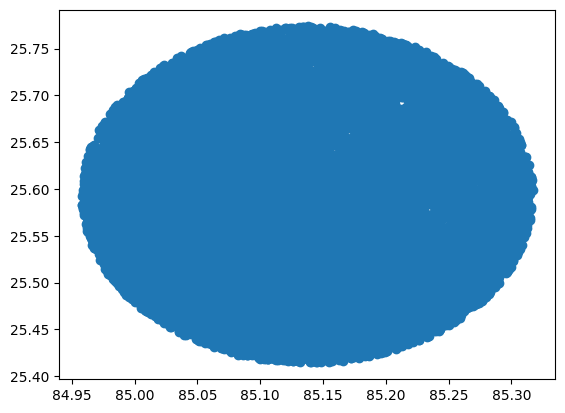

In [4]:
plt.scatter(df_raw["Longitude"], df_raw["Latitude"])

print(plt.xlim())
print(plt.ylim())

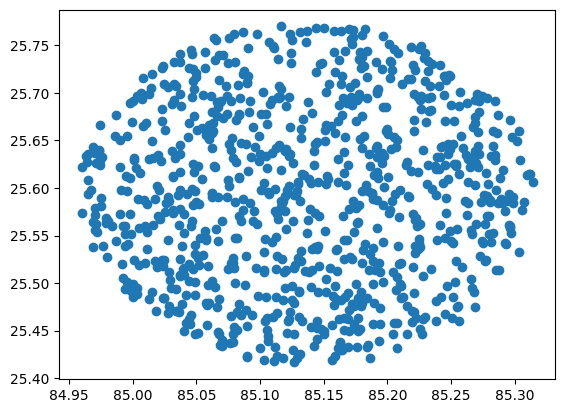

distance between min and max: 35.72157490573751 km
distance between min and max: 39.33013334418423 km


In [11]:

area = "Fraser Road"
df_pruned = df_raw[df_raw["Locality"] == area].reset_index(drop=True).reset_index(drop=False)

plt.scatter(df_pruned["Longitude"], df_pruned["Latitude"])
plt.show()

xmin, xmax = df_pruned["Longitude"].idxmin(), df_pruned["Longitude"].idxmax()

xmin_longitude, xmin_latitude = df_pruned["Longitude"][xmin], df_pruned["Latitude"][xmin]
xmax_longitude, xmax_latitude = df_pruned["Longitude"][xmax], df_pruned["Latitude"][xmax]

print("distance between min and max:", haversine_distance(xmin_latitude, xmin_longitude, xmax_latitude, xmax_longitude), "km")

xmin, xmax = df_pruned["Latitude"].idxmin(), df_pruned["Latitude"].idxmax()

xmin_longitude, xmin_latitude = df_pruned["Longitude"][xmin], df_pruned["Latitude"][xmin]
xmax_longitude, xmax_latitude = df_pruned["Longitude"][xmax], df_pruned["Latitude"][xmax]

print("distance between min and max:", haversine_distance(xmin_latitude, xmin_longitude, xmax_latitude, xmax_longitude), "km")

In [2]:
df_raw["Network Type"] = df_raw["Network Type"].map({"3G": 0, "4G": 1, "5G": 2, "LTE": 3})

area = "Fraser Road"
df_pruned = df_raw[df_raw["Locality"] == area].reset_index(drop=True).reset_index(drop=False)

df_pruned = df_pruned.rename(columns={'index': 'node'})

features = ["Longitude",
            "Latitude", 
            "Network Type", 
            "Signal Strength (dBm)", 
            "Data Throughput (Mbps)"]

df_pruned = df_pruned[features]

print(df_pruned.columns)

Index(['Longitude', 'Latitude', 'Network Type', 'Signal Strength (dBm)',
       'Data Throughput (Mbps)'],
      dtype='object')


In [3]:
numerical_columns = ["Longitude", "Latitude", "Signal Strength (dBm)", "Data Throughput (Mbps)"]

traindata = df_pruned.copy()
traindata[numerical_columns] = traindata[numerical_columns].apply(lambda x: 2 * (x - x.min()) / (x.max() - x.min()) - 1)

traindata["Longitude"] *= 20
traindata["Latitude"] *= 20

traindata.columns

traindata = traindata.to_numpy()

print(traindata.shape)

(897, 5)


In [16]:
from sklearn.cluster import KMeans
import math

class CustomKMeans:
    def __init__(self, n_clusters=6, max_iter=100, radius=5):

        self.model = KMeans(n_clusters=n_clusters, max_iter=max_iter, random_state=42)
        self.radius = radius

    def haversine_distance(lat1, lon1, lat2, lon2):

        lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a))

        r = 6371

        return c * r

    def fit(self, x):
        
        self.model.fit(x)
        self.centroids = self.model.cluster_centers_

    def predict_one(self, x):
        
        pred = self.model.predict(x)
        
        print(pred)

        centroid = self.centroids[pred][0]
        
        distance = self.haversine_distance(centroid[1], centroid[0], x[0][1], x[0][0])

        print(distance)
        
        if distance < self.radius:
            return pred
        else:
            return -1

[5]
665.6047982384357
[0]
557.4263927126774
[1]
563.1292709067575
[1]
694.9413407286195
[2]
951.221254978136
[0]
427.91771926777983
[5]
458.1346515313722
[3]
478.79279264749664
[1]
442.0521363829035
[3]
1114.2611939154674
[3]
314.99553733166005
[5]
485.80986762877524
[1]
617.1675013577744
[0]
903.4578133467842
[2]
354.7723290938074
[2]
699.2566688983945
[4]
423.2686037220207
[5]
654.7876625998347
[0]
957.0616458949561
[2]
891.3370800478535
[1]
325.4901079378124
[1]
915.7828200024559
[0]
597.4769531685926
[1]
724.9058480626787
[3]
472.992148348713
[3]
692.2995708790023
[3]
444.58360986934525
[4]
1025.8904662715308
[3]
512.2234469660127
[3]
573.8287613586698
[5]
511.62621452572574
[0]
1195.998658685961
[4]
589.5426382600268
[4]
1126.3977637977093
[5]
768.8245509068649
[1]
301.1662178440179
[5]
563.795910158147
[5]
621.1758133715972
[3]
1137.5166748943386
[5]
387.2056014748336
[3]
864.7310424964611
[1]
458.1685885353975
[0]
1011.2041841305934
[3]
793.8206105669271
[5]
644.5779173267803
[2

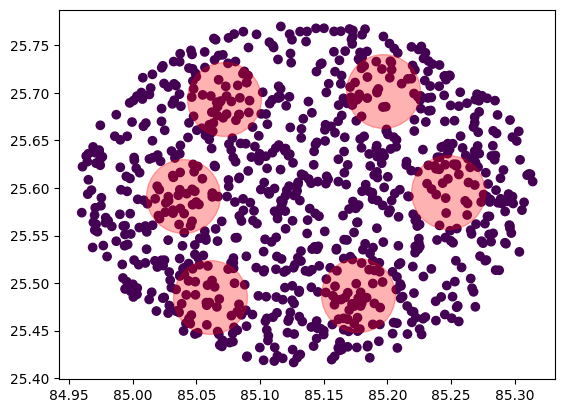

In [17]:
import matplotlib.pyplot as plt
import numpy as np

kmeans = CustomKMeans(n_clusters=6, max_iter=100, radius=5)
kmeans.fit(traindata)
labels = [kmeans.predict_one(x.reshape(1,-1)) for x in traindata]

print(np.unique(labels, return_counts=True))

centroids = kmeans.centroids[:, 0:2]

centroids /= 20
centroids[:, 0] = (centroids[:, 0] + 1) / 2 * (df_pruned["Longitude"].max() - df_pruned["Longitude"].min()) + df_pruned["Longitude"].min()
centroids[:, 1] = (centroids[:, 1] + 1) / 2 * (df_pruned["Latitude"].max() - df_pruned["Latitude"].min()) + df_pruned["Latitude"].min()

longitudes = df_pruned[["Longitude"]].values
latitudes = df_pruned[["Latitude"]].values


def radius_to_size(radius):
    return np.pi * (radius ** 2)


plt.scatter(longitudes, latitudes, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=radius_to_size(30), alpha=0.3)

plt.show()

# get xmin and ymin

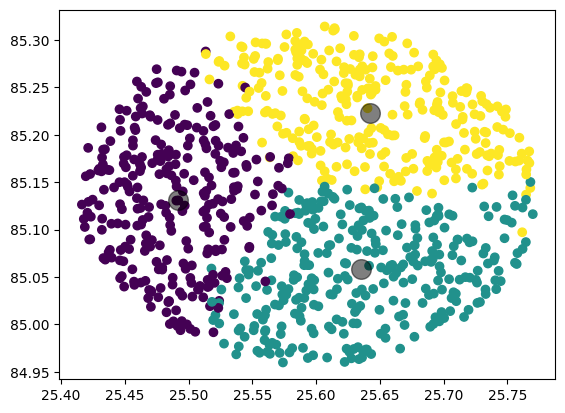

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42).fit(traindata)
labels = gm.predict(traindata)

means = gm.means_[:, 0:2]

means /= 20
means[:, 0] = (means[:, 0] + 1) / 2 * (df_pruned["Latitude"].max() - df_pruned["Latitude"].min()) + df_pruned["Latitude"].min()
means[:, 1] = (means[:, 1] + 1) / 2 * (df_pruned["Longitude"].max() - df_pruned["Longitude"].min()) + df_pruned["Longitude"].min()

latitudes = df_pruned[["Latitude"]].values
longitudes = df_pruned[["Longitude"]].values

plt.scatter(latitudes, longitudes, c=labels, cmap='viridis')
plt.scatter(means[:, 0], means[:, 1], c='black', s=200, alpha=0.5)